In [11]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from neuralforecast.utils import AirPassengersDF

# data

In [2]:
# Split data and declare panel dataset
Y_df = AirPassengersDF
Y_train_df = Y_df[Y_df.ds <= "1959-12-31"]  # 132 train
Y_test_df = Y_df[Y_df.ds > "1959-12-31"]  # 12 test

In [3]:
Y_train_df.head()

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


In [4]:
Y_test_df.head()

,unique_id,ds,y
132,1.0,1960-01-31,417.0
133,1.0,1960-02-29,391.0
134,1.0,1960-03-31,419.0
135,1.0,1960-04-30,461.0
136,1.0,1960-05-31,472.0


In [5]:
Y_train_df.shape

(132, 3)

In [6]:
Y_test_df.shape

(12, 3)

# model fit

In [7]:
horizon = len(Y_test_df)
models = [
    NBEATS(input_size = 2 * horizon, h = horizon, max_steps = 50),
    NHITS(input_size = 2 * horizon, h = horizon, max_steps = 50)
]
nf = NeuralForecast(models = models, freq = "M")
nf.fit(df = Y_train_df)

Seed set to 1
Seed set to 1


Sanity Checking: |                                                           | 0/? [00:00<?, ?it/s]

Training: |                                                                  | 0/? [00:00<?, ?it/s]

Validation: |                                                                | 0/? [00:00<?, ?it/s]

Sanity Checking: |                                                           | 0/? [00:00<?, ?it/s]

Training: |                                                                  | 0/? [00:00<?, ?it/s]

Validation: |                                                                | 0/? [00:00<?, ?it/s]

# model predict

In [8]:
Y_hat_df = nf.predict().reset_index()
Y_hat_df

Predicting: |                                                                | 0/? [00:00<?, ?it/s]

Predicting: |                                                                | 0/? [00:00<?, ?it/s]

,unique_id,ds,NBEATS,NHITS
0,1.0,1960-01-31,425.596375,413.865509
1,1.0,1960-02-29,443.887817,442.154358
2,1.0,1960-03-31,454.915710,450.776276
3,1.0,1960-04-30,458.013977,471.883911
4,1.0,1960-05-31,508.807678,524.092896
5,1.0,1960-06-30,575.352905,552.629578
6,1.0,1960-07-31,632.232361,611.542725
7,1.0,1960-08-31,621.064697,606.976562
8,1.0,1960-09-30,549.932373,555.571350
9,1.0,1960-10-31,485.841156,523.980347


# plot_predictions

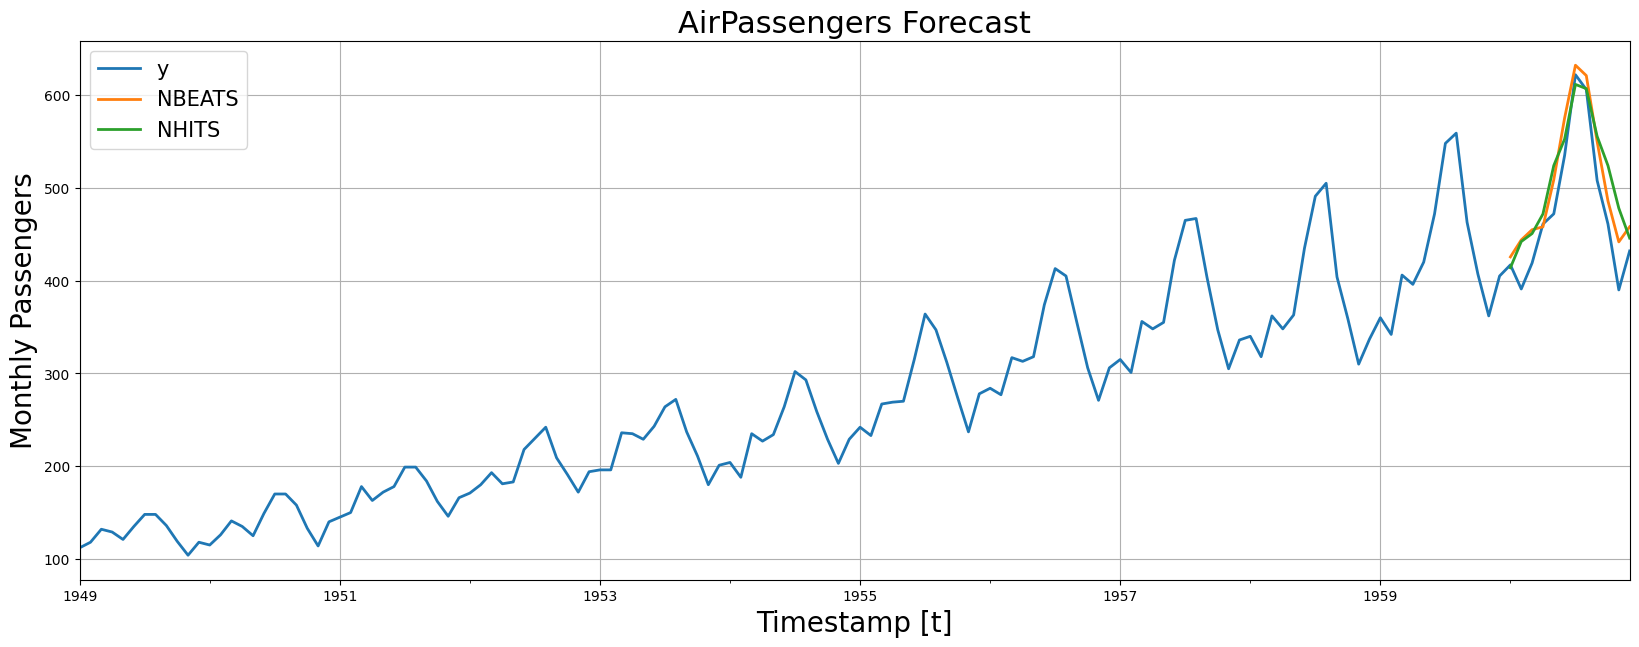

In [9]:
# test and predictions data
Y_hat_df = Y_test_df.merge(Y_hat_df, how = "left", on = ["unique_id", "ds"])
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index("ds")

# plot
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df[["y", "NBEATS", "NHITS"]].plot(ax = ax, linewidth = 2)
ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()